In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta 
import os
import datetime
import json
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbt as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from weekend import get_data,Strategy
# plt.style.use('seaborn')
df_dict = {}

/Users/johnsonhsiao/DC_capital_intern/strategy_research/CTA_TEST/Crypto/weekend/../../vectorbtpro/accessors.py:188: UserWarning: registration of accessor <class 'vectorbtpro.accessors.Vbt_SRAccessor'> under name 'vbt' for type <class 'pandas.core.series.Series'> is overriding a preexisting attribute with the same name.
  class Vbt_SRAccessor(DirNamesMixin, GenericSRAccessor):
/Users/johnsonhsiao/DC_capital_intern/strategy_research/CTA_TEST/Crypto/weekend/../../vectorbtpro/accessors.py:208: UserWarning: registration of accessor <class 'vectorbtpro.accessors.Vbt_DFAccessor'> under name 'vbt' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  class Vbt_DFAccessor(DirNamesMixin, GenericDFAccessor):


In [2]:
df_dict = {}
candidate = ['ETH','BTC','BNB','SOL','MATIC',
               'XRP','DYDX','AVAX','LINK','GAS',
               'DOGE','ORDI','TRB','WLD','ADA',
               'OP','FIL','ZRX','LTC','RUNE','ATOM',
               'ARB','GMT','ETC','ARK','BCH','DOT',
               'LDO','SUI','GALA','CAKE',
               'APE','INJ','FTM','APT','YFI','OMG',
               'SEI','EOS','1000SHIB','NEAR',
               'MKR','CYBER','UNI',
               'BLUR','SUSHI','WAVES','MASK','MANA',
               'EGLD','AAVE','NEO','FET','TRX','GRT','ALGO','STX','XLM']
for coin in candidate:
    df_dict[coin] = pd.read_hdf(f'/Users/johnsonhsiao/Desktop/data/{coin}USDT_PERPETUAL.h5')

In [5]:
# 假日時段：UTC+0 週五 22:00 - 週日 22:00

APY: 25.63 %
MDD: 11.68 %
MDD Duration 92 days 06:55:00
worst trade: -8.57 %
2022-06-18 01:30:00 ~ 2022-06-18 21:25:00
avg holding days: 0.20 days
--------------------------------------------
PF: 1.60
Sharpe Ratio: 1.64
Calmar Ratio: 1.99
Sortino Ratio: 2.31
Omega Ratio: 1.05
--------------------------------------------
Expectancy : 0.10 %
Total Time Exposure : 13.49 %
Total Trades: 461
Win Rate: 71.15 %
--------------------------------------------
PF * Win Rate: 1.140


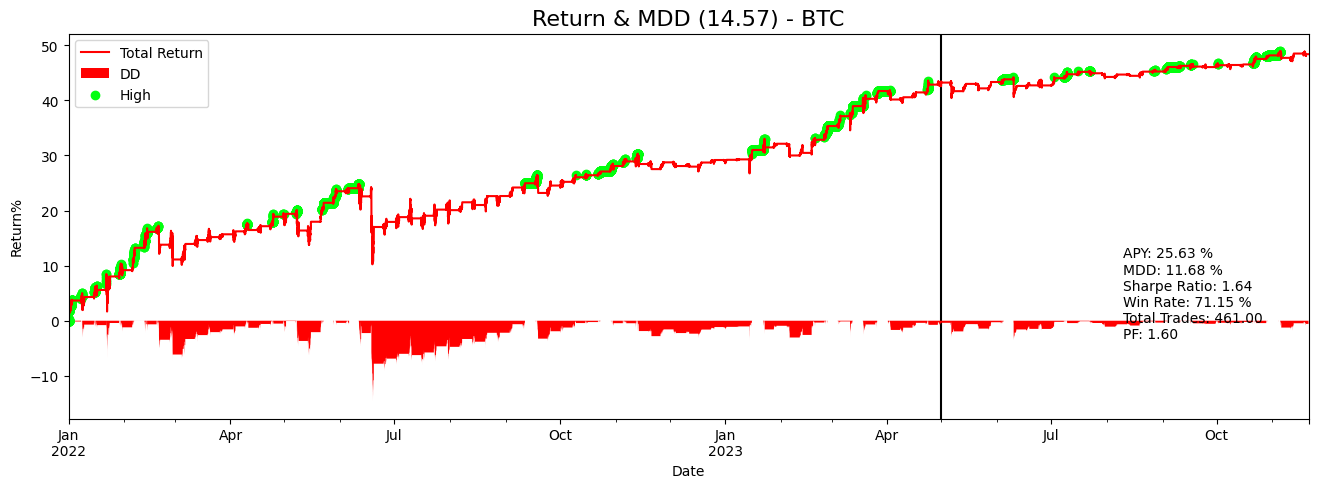

(None,
 Start                               2022-01-01 00:00:00
 End                                 2023-11-21 00:55:00
 Period                                689 days 01:00:00
 Start Value                                     10000.0
 Min Value                                   9993.307096
 Max Value                                  14895.372987
 End Value                                  14837.795404
 Total Return [%]                              48.377954
 Benchmark Return [%]                         -19.327095
 Total Time Exposure [%]                       13.485417
 Max Gross Exposure [%]                            100.0
 Max Drawdown [%]                              11.677179
 Max Drawdown Duration                  92 days 06:55:00
 Total Orders                                        922
 Total Fees Paid                             2768.280023
 Total Trades                                        461
 Win Rate [%]                                  71.149675
 Best Trade [%]         

In [10]:
start = '2022-01-01'
sep = ''
end = ''

side = 'long'
params = {'window': 32}
config = {'freq':'5min', 'lag':1, 'fee': 0.0003}
coin = 'BTC'
df = get_data(coin)
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
analyze.show_pf_analysis(params, side, coin, axv_index=['2023-05-01'])

In [8]:
start= '2022-01-01'
end ='2023-05-01'

params={
   'window': [12*1, 12*24, 3],
    }
    
config = {'freq':'5min','fee': 0.0003}
symbol_list = ['BTC']#,'ETH','LTC','XRP','BCH','AAVE']
sample_sets = [[start,end]]

multi_test = MultiTester(
    Strategy,
    get_data_func=get_data,
    params=params,
    config=config,
    df_dict=df_dict,
    symbol_list=symbol_list,
    start=start,
    end=end
    )

# multi_test.run(optimize=True,rolling=False,side_list=['L/S','both'],sep='2023-03-01')

In [9]:
all_params = multi_test.multi_params(['BTC'],sample_sets,direction='long')
trades, value_df = multi_test.multi_params_result(all_params)
multi_test.save_version_result(all_params,value_df,trades,1)
all_params

======================= BTC LONG Optimize Test =======================
Optimization trails: 92


100%|██████████| 92/92 [00:08<00:00, 10.98it/s]


Optimization time: 8.4 sec
---------- BTC LONG ----------
{'window': 33}
+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |     15.62 | 2850.49 | -1288.16 |       2.21 |   75.81 |         62 |
| 2022-06    |      3.03 | 2743.68 | -2441.08 |       1.12 |   70    |         60 |
| 2022-09    |      5.83 | 2160.88 | -1577.41 |       1.37 |   71.93 |         57 |
| 2022-12    |      2.93 |  991.89 |  -699.31 |       1.42 |   69.35 |         62 |
| 2023-03    |     12.83 | 1759.37 |  -476.35 |       3.69 |   78.85 |         52 |
| 2023-06    |      1.62 |  454.35 |  -292.06 |       1.56 |   63.64 |         22 |
+------------+-----------+---------+----------+------------+---------+------------+


{'BTC': {'long': {0: {'window': 33.0}}}}